<a href="https://colab.research.google.com/github/JoaoRudolf/BigDataClientes/blob/main/Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=3bf6a29e3db23cee5ceb214e5ea363b31dea804ac6554826141ddf9f504c2f46
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("clientes").getOrCreate()

In [ ]:
df = spark.read.csv("clientes.csv", header=True, inferSchema=True)

In [ ]:
df.show(2)

+-----------------+----------------+-----------------+--------------------+--------------+-----------------------+--------------+-----+--------------+
|DiasProjetoPronto|AmbientesOrçados|AmbientesFechados|PressaOrçamento(1=s)|Indicação(1=s)|Casa 0 ou Apartamento 1|Renda Familiar|Idade|Valor da Venda|
+-----------------+----------------+-----------------+--------------------+--------------+-----------------------+--------------+-----+--------------+
|                5|               2|                0|                   0|             0|                      1|           8.0|   50|             0|
|                5|               1|                0|                   1|             0|                      1|          4.25|   31|             0|
+-----------------+----------------+-----------------+--------------------+--------------+-----------------------+--------------+-----+--------------+
only showing top 2 rows



In [8]:
df.describe().toPandas()

,summary,DiasProjetoPronto,AmbientesOrçados,AmbientesFechados,PressaOrçamento(1=s),Indicação(1=s),Casa 0 ou Apartamento 1,Renda Familiar,Idade,Valor da Venda
0,count,60,60,60,60,60,60,60,60,60
1,mean,4.733333333333333,2.25,0.5166666666666667,0.23333333333333334,0.2,0.6333333333333333,9.956666666666669,36.3,2469.0833333333335
2,stddev,0.9363953001762079,1.144256105029947,0.9476405430700277,0.4265218680850987,0.40337558727168876,0.4859611014169709,5.102047334712774,10.661669026971245,5695.376767024424
3,min,2,1,0,0,0,0,1.8,21,0
4,max,7,5,4,1,1,1,25.0,58,34000


In [9]:
df.groupby('Valor da Venda').count().toPandas()

,Valor da Venda,count
0,6500,1
1,5100,1
2,8500,1
3,1350,1
4,14345,1
5,3500,1
6,34000,1
7,1250,1
8,3800,1
9,1000,1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

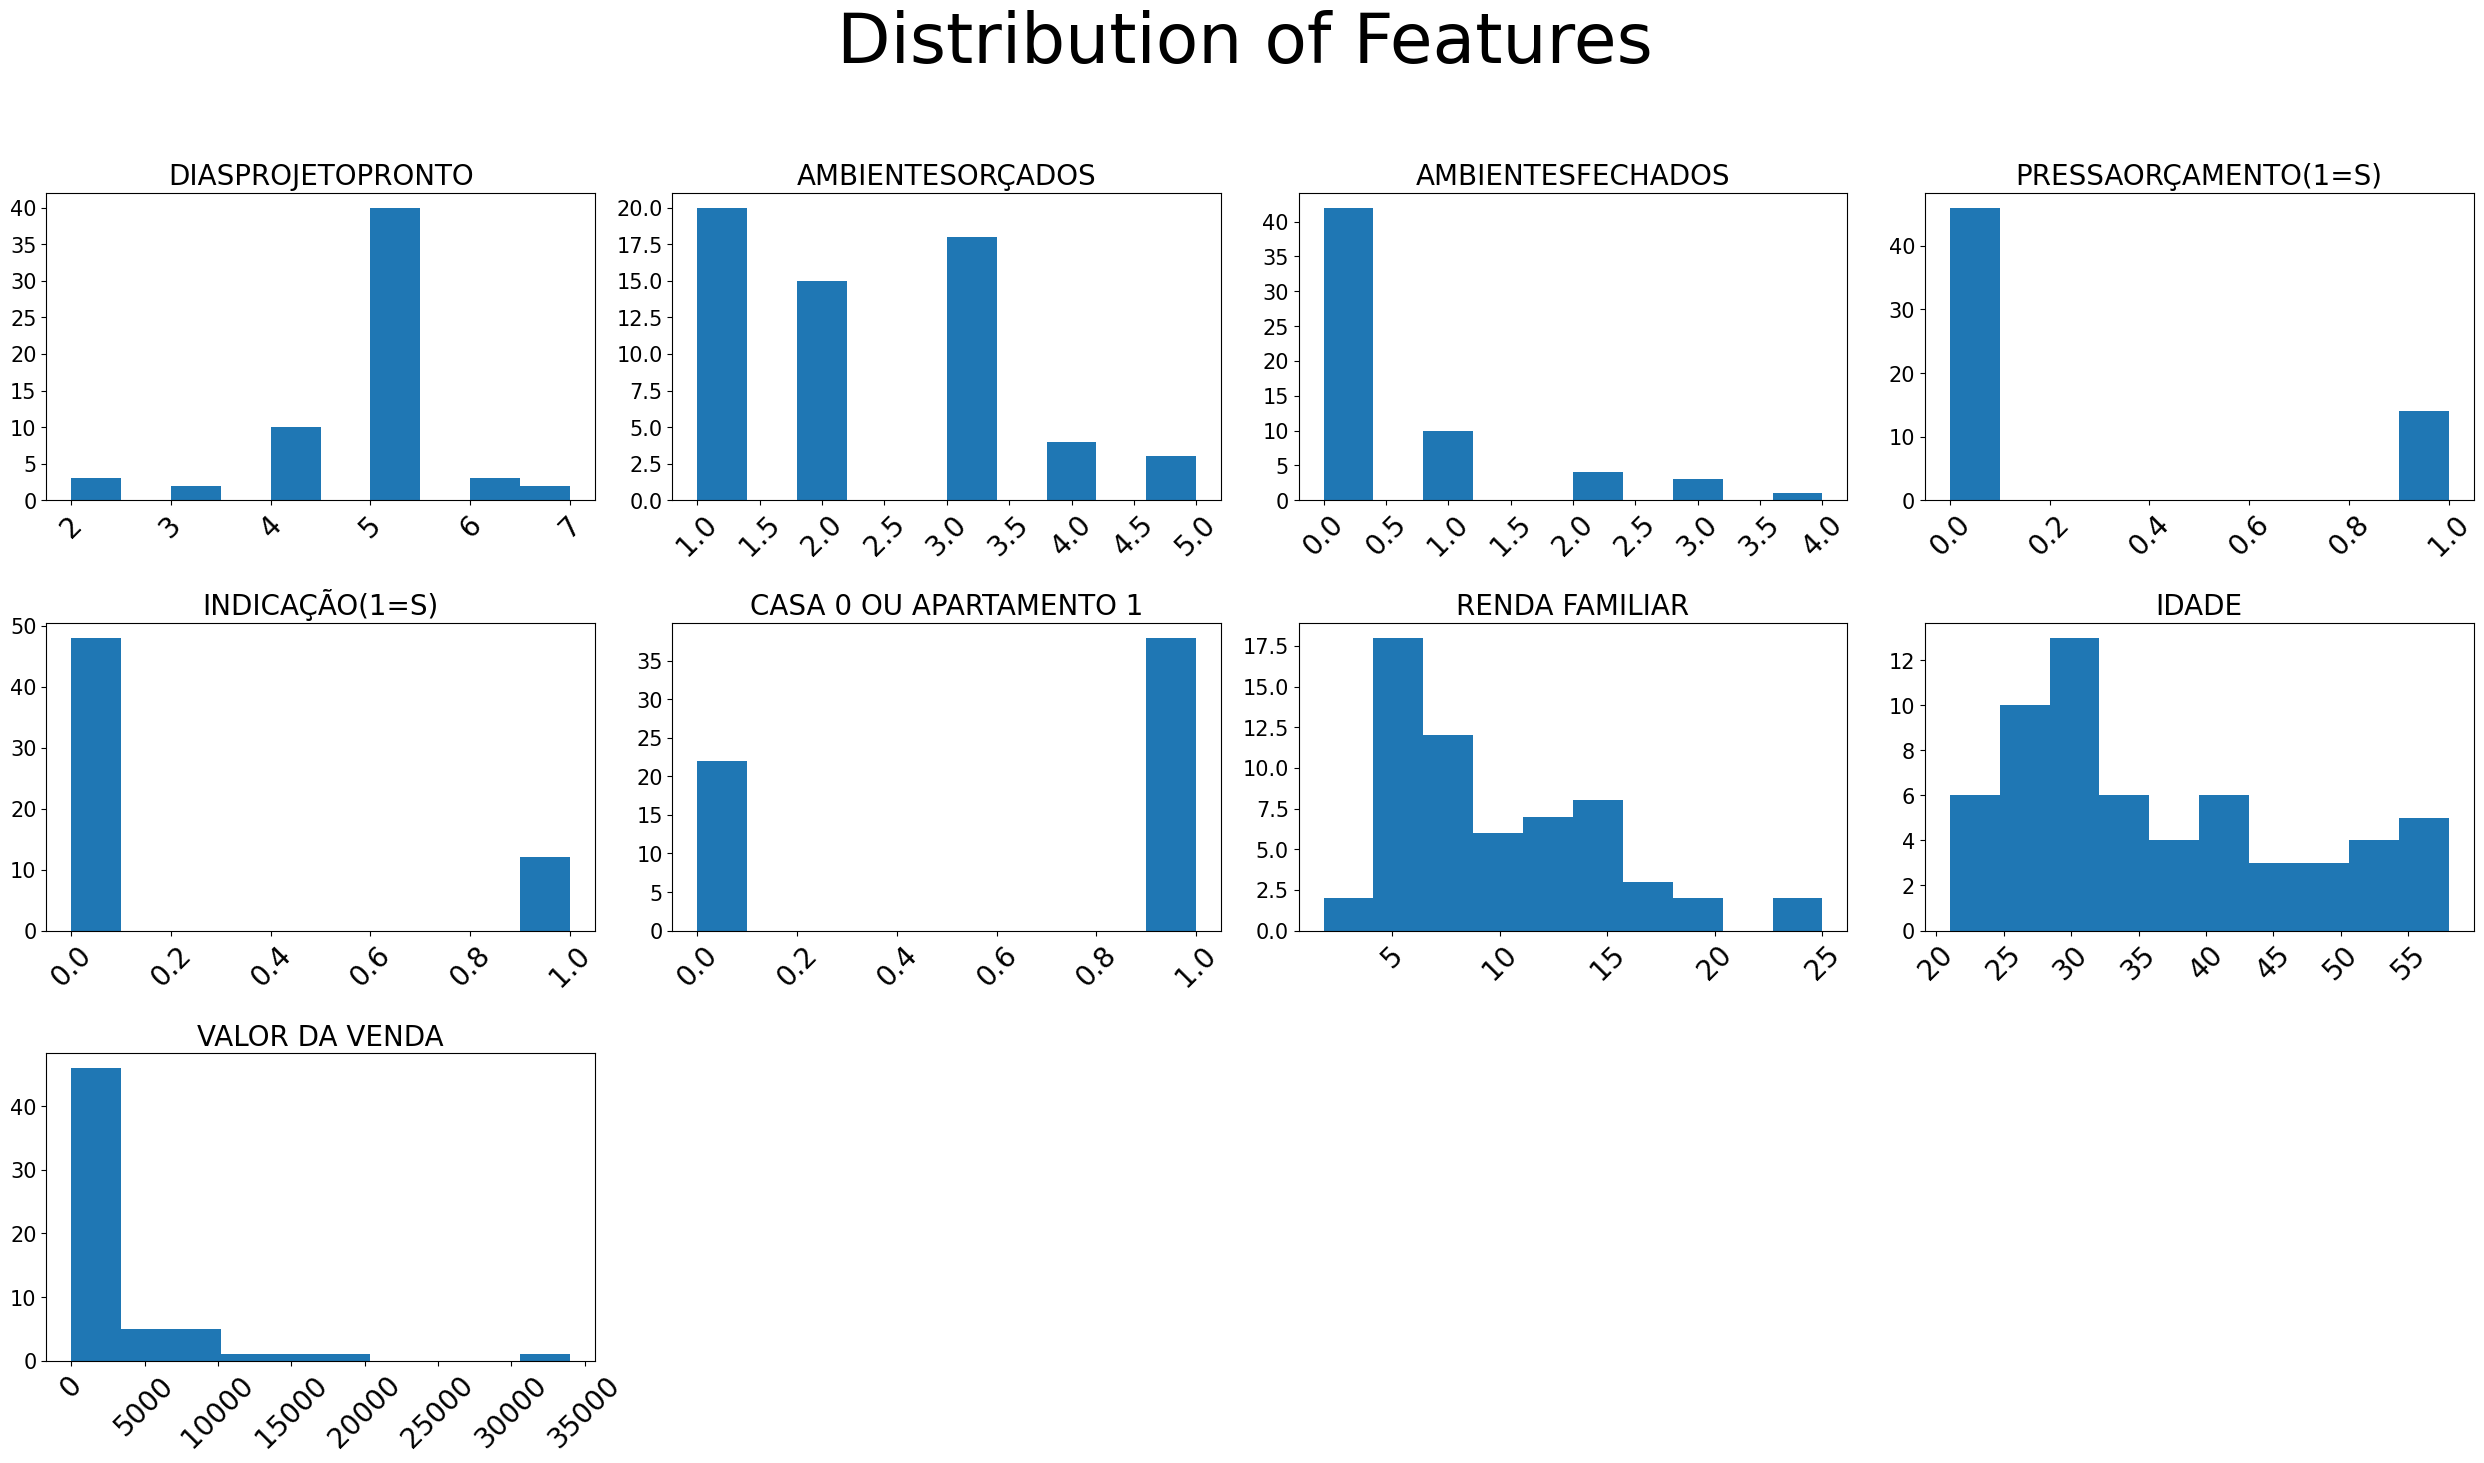

In [11]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3,4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()